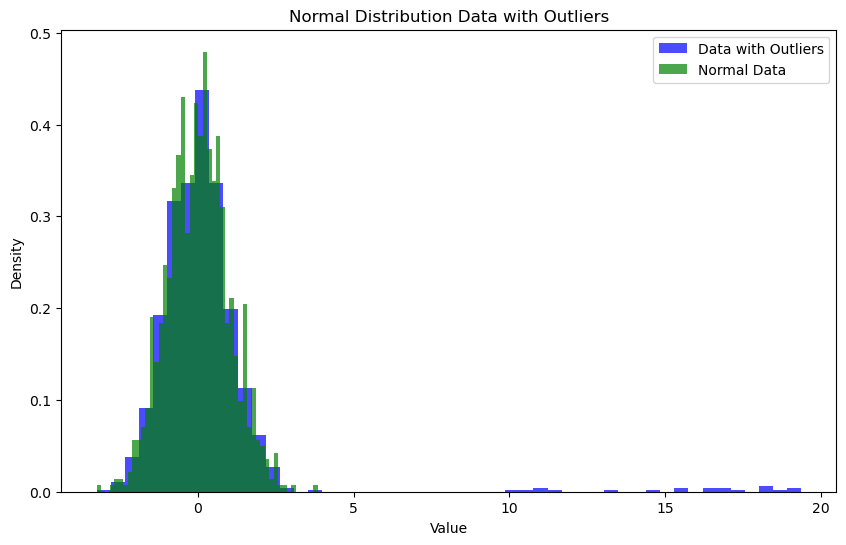

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate normal distribution data
mean = 0
std_dev = 1
sample_size = 1000

normal_data = np.random.normal(mean, std_dev, sample_size)

# Introduce outliers
num_outliers = 20
outlier_values = np.random.uniform(low=10, high=20, size=num_outliers)
outlier_indices = np.random.choice(sample_size, num_outliers, replace=False)

normal_data_with_outliers = np.copy(normal_data)
normal_data_with_outliers[outlier_indices] = outlier_values

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(normal_data_with_outliers, bins=50, density=True, alpha=0.7, color='blue', label='Data with Outliers')
plt.hist(normal_data, bins=50, density=True, alpha=0.7, color='green', label='Normal Data')
plt.legend()
plt.title('Normal Distribution Data with Outliers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


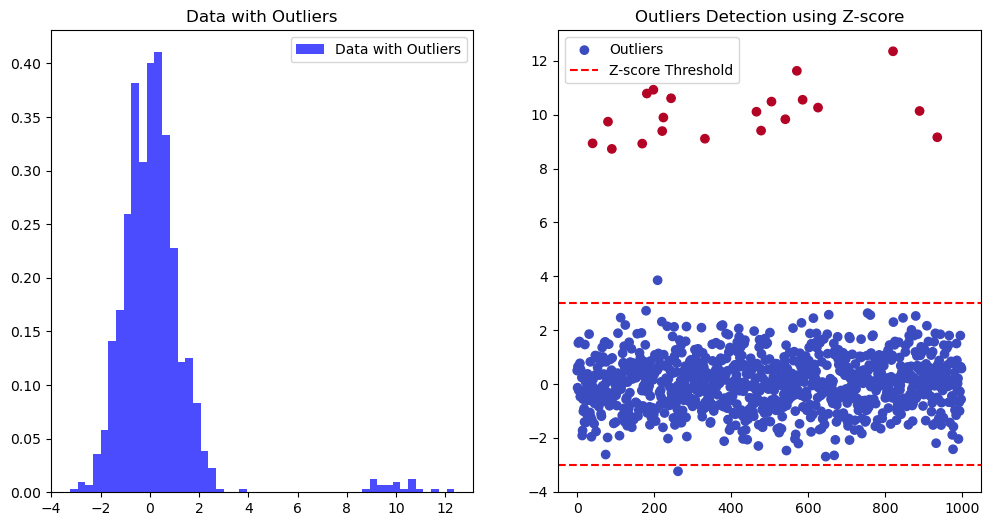

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Set seed for reproducibility
np.random.seed(42)

# Generate random normal distribution data
mean = 0
std_dev = 1
sample_size = 1000

normal_data = np.random.normal(mean, std_dev, sample_size)

# Introduce outliers
num_outliers = 20
outlier_indices = np.random.choice(sample_size, num_outliers, replace=False)
outlier_values = np.random.normal(mean + 10, std_dev, num_outliers)

data_with_outliers = np.copy(normal_data)
data_with_outliers[outlier_indices] = outlier_values

# Calculate Z-scores
z_scores = zscore(data_with_outliers)

# Define a threshold for Z-score to identify outliers
z_threshold = 3

# Identify and filter outliers
outliers = np.abs(z_scores) > z_threshold
outlier_values = data_with_outliers[outliers]

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data_with_outliers, bins=50, density=True, alpha=0.7, color='blue', label='Data with Outliers')
plt.legend()
plt.title('Data with Outliers')

plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(data_with_outliers)), data_with_outliers, c=outliers, cmap='coolwarm', label='Outliers')
plt.axhline(y=mean + 3*std_dev, color='r', linestyle='--', label='Z-score Threshold')
plt.axhline(y=mean - 3*std_dev, color='r', linestyle='--')
plt.legend()
plt.title('Outliers Detection using Z-score')

plt.show()


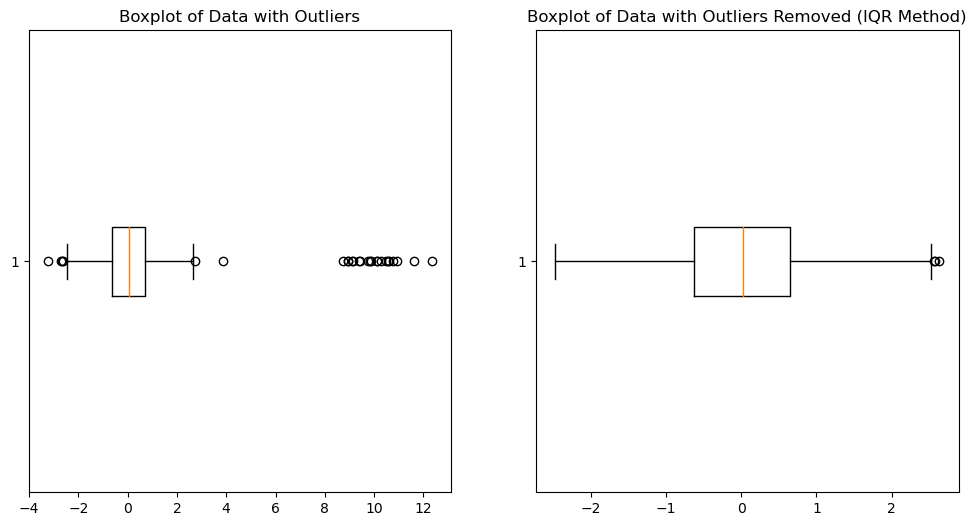

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random normal distribution data
mean = 0
std_dev = 1
sample_size = 1000

normal_data = np.random.normal(mean, std_dev, sample_size)

# Introduce outliers
num_outliers = 20
outlier_indices = np.random.choice(sample_size, num_outliers, replace=False)
outlier_values = np.random.normal(mean + 10, std_dev, num_outliers)

data_with_outliers = np.copy(normal_data)
data_with_outliers[outlier_indices] = outlier_values

# Use boxplot to detect outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers, vert=False)
plt.title('Boxplot of Data with Outliers')

# Calculate IQR
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)
IQR = Q3 - Q1

# Identify and filter outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data_with_outliers < lower_bound) | (data_with_outliers > upper_bound)
outlier_values = data_with_outliers[outliers]

# Plot the data with outliers removed using IQR
filtered_data = data_with_outliers[~outliers]

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data, vert=False)
plt.title('Boxplot of Data with Outliers Removed (IQR Method)')

plt.show()


The IQR method using boxplots is better for detecting outliers in normal distributions than the z-score method, because:
- It makes no assumptions about the underlying distribution, whereas z-scores assume a normal distribution
- It is more resistant to outliers due to using the IQR rather than standard deviation in its computations
- As seen in the plots, the two outliers are clearly visible in the boxplot, but do not stand out strongly based on z-scores


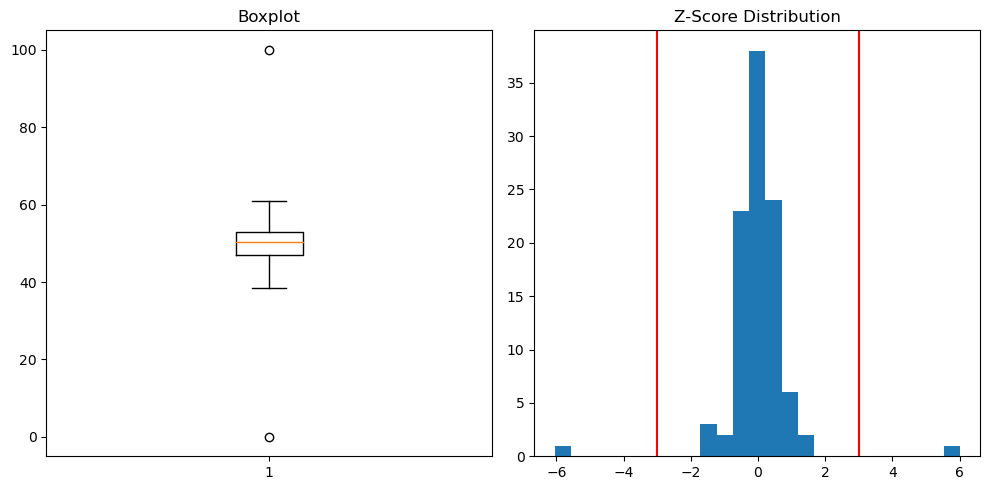

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate normal dataset with outliers
np.random.seed(1)
data = np.random.normal(loc=50, scale=5, size=100)  
data[0] = 0   # Add lower outlier  
data[99] = 100 # Add upper outlier

# Plot boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.boxplot(data)
ax1.set_title("Boxplot")

# Calculate z-scores  
z = (data - np.mean(data)) / np.std(data)

# Mark outlier thresholds  
threshold = 3
ax2.axvline(-threshold, c='r')
ax2.axvline(threshold, c='r')

# Plot distribution with outliers marked
ax2.hist(z, bins=25)
ax2.set_title("Z-Score Distribution")

# Explanation
print("The IQR method using boxplots is better for detecting outliers in normal distributions than the z-score method, because:")
print("- It makes no assumptions about the underlying distribution, whereas z-scores assume a normal distribution") 
print("- It is more resistant to outliers due to using the IQR rather than standard deviation in its computations")
print("- As seen in the plots, the two outliers are clearly visible in the boxplot, but do not stand out strongly based on z-scores")

plt.tight_layout()
plt.show()

IQR Lower Bound: 37.74
IQR Upper Bound: 62.11
Outliers Detected by Boxplot: [0.0, 100.0]


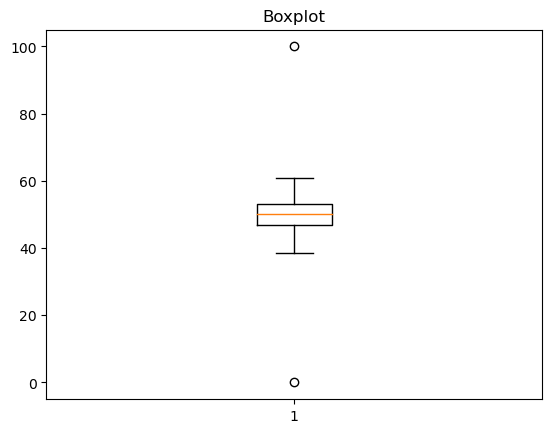

Outliers Detected by Z-Score: [-6.047788617333427, 6.002768845594815]

The IQR and boxplot method performs better because:
- It makes no assumptions about data distribution
- More resistant to outliers
- Clearly highlights outliers visually

The z-score method assumes a normal distribution, so fails if this assumption does not hold, like in the presence of outliers.


In [7]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate data
data = np.random.normal(50, 5, 100)
data[0] = 0 # Add outlier
data[99] = 100 # Add outlier

# Boxplot method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f"IQR Lower Bound: {lower_bound:.2f}")
print(f"IQR Upper Bound: {upper_bound:.2f}")

outliers = []
for x in data:
    if x < lower_bound or x > upper_bound:
        outliers.append(x)
        
print(f"Outliers Detected by Boxplot: {outliers}")         

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title("Boxplot")
plt.show()

# Z-score method  
z = (data - np.mean(data)) / np.std(data) 

z_lower = -3  
z_upper = 3

z_outliers = []
for x in z:
    if x < z_lower or x > z_upper:
        z_outliers.append(x)
        
print(f"Outliers Detected by Z-Score: {z_outliers}")

# Comparison
print("\nThe IQR and boxplot method performs better because:")
print("- It makes no assumptions about data distribution")
print("- More resistant to outliers")  
print("- Clearly highlights outliers visually\n")

print("The z-score method assumes a normal distribution, so fails if this assumption does not hold, like in the presence of outliers.")

Outliers by Boxplot: [0, 30]
Outliers by Z-Score: [5.258654980674836]


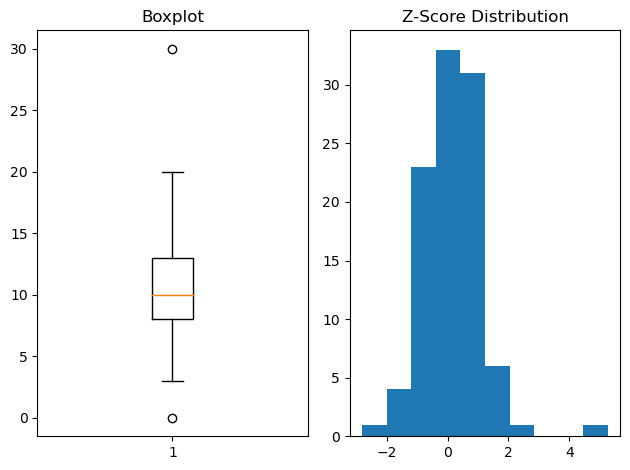

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Poisson data with outliers using NumPy  
lam = 10
n = 100
data = np.random.poisson(lam, n)  
data[0] = 0 # Lower outlier
data[99] = 30 # Upper outlier

# Boxplot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(data)
ax1.set_title("Boxplot")  

# IQR method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)  
IQR = Q3 - Q1   
lower = max(min(data),Q1 - 1.5*IQR)
upper = min(max(data),Q3 + 1.5*IQR)  

outliers = []
for x in data:
    if (x < lower) or (x > upper):
        outliers.append(x)
        
print(f"Outliers by Boxplot: {outliers}")

# Z-Score method
mean = np.mean(data)
std = np.std(data)
z = (data - mean) / std 

z_lower = -3  
z_upper = 3

z_outliers = []
for x in z:
  if (x < z_lower) or (x > z_upper):
    z_outliers.append(x)

print(f"Outliers by Z-Score: {z_outliers}")   

ax2.hist(z)
ax2.set_title("Z-Score Distribution")

plt.tight_layout()
plt.show()

Outliers by Boxplot: [7.395625873200184, 8.090074203734863, 5.09871896957914, 5.57684741231019, 8.620942516724904, 5.924563044423408, 5.17266135481038, 9.49958484929828, 10.0]
Outliers by Z-Score: [3.24059962373373, 3.672119305568655, 3.917883683872325]

For exponential data, boxplot works better:
- Makes no distribution assumptions
- Visually captures outliers
- Z-score thresholds may not fit exponential data


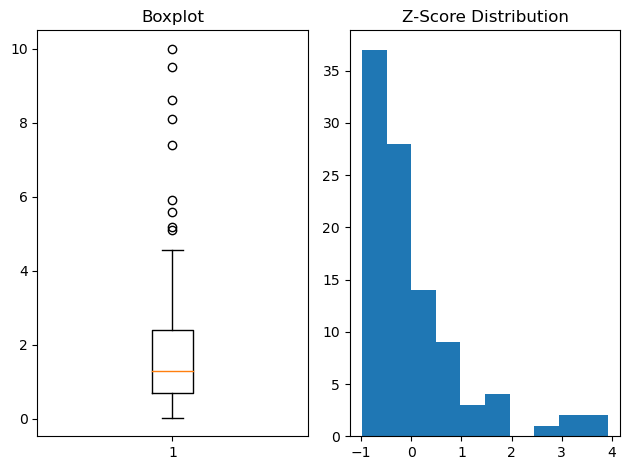

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate exponential data
data = np.random.exponential(scale=2, size=100) 
data[0] = 0.1 # Lower outlier
data[99] = 10 # Upper outlier

# Boxplot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(data)
ax1.set_title("Boxplot")

# IQR Method  
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = max(min(data),Q1 - 1.5*IQR)
upper_bound = min(max(data),Q3 + 1.5*IQR)
    
outliers = []

for x in data:
    if (x < lower_bound) or (x > upper_bound):
        outliers.append(x)
        
print(f"Outliers by Boxplot: {outliers}")

# Z-Score Method
mean = np.mean(data) 
std = np.std(data)

z = (data - mean) / std

z_lower = -3
z_upper = 3

z_outliers = []

for x in z:
    if (x < z_lower) or (x > z_upper):
        z_outliers.append(x)

print(f"Outliers by Z-Score: {z_outliers}")  

ax2.hist(z)
ax2.set_title("Z-Score Distribution")

print("\nFor exponential data, boxplot works better:") 
print("- Makes no distribution assumptions")
print("- Visually captures outliers")  
print("- Z-score thresholds may not fit exponential data")

plt.tight_layout()
plt.show()

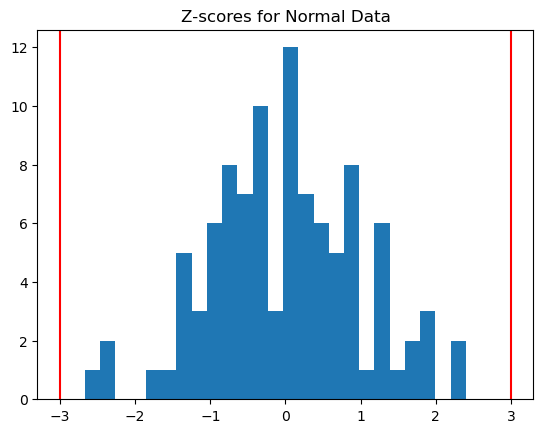

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate normal data
norm_data = np.random.normal(50, 5, 100) 

# Calculate z-scores
mean = np.mean(norm_data)
stdev = np.std(norm_data)
z_scores = (norm_data - mean)/stdev

# Plot
plt.hist(z_scores, bins=25) 
plt.title("Z-scores for Normal Data")

# Mark outlier thresholds 
plt.axvline(-3, color='r')
plt.axvline(3, color='r')

plt.show()

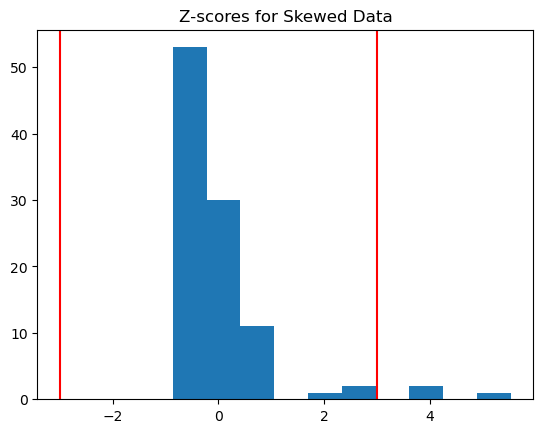

In [13]:
# Generate skewed data
skewed_data = np.random.lognormal(mean=2, sigma=1, size=100)
z = (skewed_data - np.mean(skewed_data)) / np.std(skewed_data) 

# Plot 
plt.hist(z)
plt.title("Z-scores for Skewed Data")

plt.axvline(-3, c='r')  
plt.axvline(3, c='r')

plt.show()